- 📚 데이터 사이언티스트의 실전노트, 이지영, [비제이퍼블릭](https://bjpublic.tistory.com/) 
- 🌟 [YouTube: 통계학 & 데이터과학](https://https://www.youtube.com/channel/UC2BreMMPUd0djRpA4UEaD3Q)
- 💻 [클래스101: 데이터 과학자 실무 프로젝트 (분석+예측모델 + AWS 자동화)](https://class101.page.link/MhG4)


## 3.2 기본 통계로 질문자 되기 (Page 224)

### 데이터 준비

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 3) # 소숫점자리 3자리 표현

# 그래프 라이브러리 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
matplotlib.style.use('ggplot') 

# 왜도 첨도 계산을 위한 패키지 
from scipy.stats import skew, kurtosis

# 데이터 전처리에 필요한 패키지 불러오기  
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler


In [2]:
# 함수 1: 데이터 요약 테이블 구현 
def get_info(df, col_list):
    # 통계치를 저장할 빈 리스트 설정 
    list_mean = []
    list_median = []
    list_std = []
    list_min = []
    list_max = []
    list_skewness = [] 
    list_kurtosis = [] 

    for col in col_list: 
        list_mean.append(round(df[col].mean(),2)) # 평균
        list_median.append(round(df[col].median(),2)) # 중앙값
        list_std.append(round(df[col].std(),2)) # 표준편차
        list_min.append(round(df[col].min(),2)) # 최솟값
        list_max.append(round(df[col].max(),2)) # 최댓값
        list_skewness.append(round(skew(df[col]),2)) # 왜도
        list_kurtosis.append(round(kurtosis(df[col], fisher=False),2)) # 첨도

    # 리스트를 데이터프레임으로 변환
    df_info = pd.DataFrame({'열이름': col_list, 
                           '표준편차': list_std,
                            '평균': list_mean,
                            '중앙값' : list_median,
                            '최솟값': list_min,
                            '최댓값': list_max, 
                            '왜도': list_skewness, 
                            '첨도': list_kurtosis}).set_index('열이름').T
    return df_info

# 함수 2 : 데이터 프레임 구현 
from IPython.core.display import display, HTML
def df_display(dfs:list, captions:list):
    """ 데이터 프레임을 나란히 보여줌
        dfs: 데이터 프레임 리스트
        captions: 각 데이터 테이블의 설명
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0"
    display(HTML(output))

# 함수 3. 데이터 요약 테이블과 스케일링 전&후 그래프 구현 
def get_comparisons(df, cols_org, cols_scaled, text):
    
    # 데이터 요약 테이블  
    df_summary = get_info(df, cols_org + cols_scaled)
    df_display([df[cols_org + cols_scaled].head(8), df_summary], 
               ["스케일링 전&후 첫 8행", "스케일링 전&후 데이터 요약"])

    # matplotlib 폰트 설정 (Mac OS인 경우) 및 유니코드 에러 고치기 
    rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False 
    
    plt.rc('figure', figsize=[10,5]) # 그래프 사이즈 설정
    fig, (ax1, ax2) = plt.subplots(ncols=2) # 그래프 개수 설정  
    fig.subplots_adjust(wspace=0.3) # 두 그래프 간격
    
    # 첫번째 그래프 
    ax1.set_title('스케일링 전', fontweight='bold')
    sns.kdeplot(df[cols_org[0]], ax=ax1, color="blue", linestyle='--', label=cols_org[0])
    sns.kdeplot(df[cols_org[1]], ax=ax1, color="green", label=cols_org[1])
    ax1.set_xlabel('') # x-axis 제목숨김
    ax1.legend() # 범주 보이기

    # 두번째 그래프 
    ax2.set_title('스케일링 후: {}'.format(text), fontweight='bold')
    sns.kdeplot(df[cols_scaled[0]], color="blue", linestyle='--', label=cols_scaled[0], ax=ax2)
    sns.kdeplot(df[cols_scaled[1]], color="green", label=cols_scaled[1], ax=ax2)
    ax2.legend()
    ax2.set_xlabel('')
    
    return plt.show()


In [3]:
np.random.seed(100) # 임의 숫자 시드 생성 
size = 5000 

# 임의 데이터 생성 
df = pd.DataFrame({
    'nm1': np.random.normal(50, 4, size), # 평균 50, 표준편차 4를 띈 정규분포 
    'nm2': np.random.normal(-1, 0.5, size), # 평균 -1, 표준편차 0.5를 띈 정규분포
    # nm_out은 평균30, 표준편차5를 띈 정규분포 4900개 데이터 & 평균70, 표준편차1을 띈 100개 이상치 데이터
    'nm_out': np.concatenate([np.random.normal(30, 5, size-100), np.random.normal(70, 1, 100)]),
    'sk_r': np.random.exponential(10, size), # 오른쪽 비대칭을 띈 지수분포 
})


In [4]:
get_info(df, df.columns.tolist())

열이름,nm1,nm2,nm_out,sk_r
표준편차,4.07,0.50,7.50,10.14
평균,50.03,-1.00,30.86,10.06
중앙값,50.04,-1.01,30.15,6.82
최솟값,37.16,-2.65,13.88,0.01
최댓값,65.43,0.73,72.65,78.06
왜도,0.07,-0.04,2.74,1.93
첨도,3.07,2.86,15.69,8.01


### 3.2.11 피처 스케일링 방법 중 선택 기준이 있을까? 
### 3.2.11.1 StandardScaler: 평균 0, 표준편차 1로 표준화 (Page 229)

,nm1,nm2,nm1_std,nm2_std2
0,43.001,-1.723,-1.728,-1.447
1,51.371,-1.572,0.328,-1.144
2,54.612,-0.047,1.125,1.923
3,48.990,-1.247,-0.257,-0.490
4,53.925,-2.323,0.956,-2.653
5,52.057,-1.029,0.497,-0.052
6,50.885,-0.582,0.209,0.847
7,45.720,-1.199,-1.060,-0.394
열이름,nm1,nm2,nm1_std,nm2_std2
표준편차,4.070,0.500,1.000,1.000


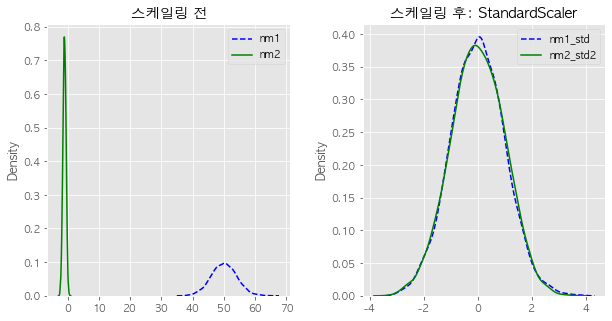

In [5]:
std_scaler = StandardScaler()
cols_org = ["nm1", "nm2"] # 바꾸고자 하는 피처 리스트 
cols_std = ["nm1_std", "nm2_std2"] # 스케일링된 피처 리스트 

# nm1과 nm2를 StandardScaler 통해 스케일링하여 df에 nm1_std, nm2_std2로 저장
df[cols_std] = pd.DataFrame(std_scaler.fit_transform(df[cols_org].values), 
                                                   columns=cols_std, 
                                                   index=df.index)

get_comparisons(df, cols_org, cols_std, 'StandardScaler')


,nm_out,sk_r,nm_out_std,sk_r_std
0,29.563,1.956,-0.173,-0.800
1,33.217,17.351,0.314,0.719
2,24.703,30.150,-0.821,1.982
3,33.258,0.426,0.320,-0.950
4,33.196,1.110,0.312,-0.883
5,27.915,16.352,-0.393,0.621
6,19.636,30.745,-1.497,2.040
7,30.232,1.773,-0.084,-0.818
열이름,nm_out,sk_r,nm_out_std,sk_r_std
표준편차,7.500,10.140,1.000,1.000


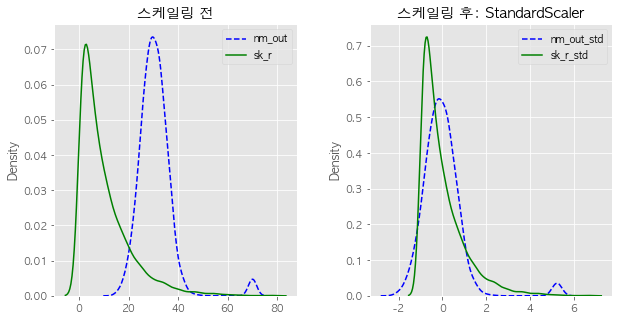

In [6]:
cols_org = ["nm_out", "sk_r"] # 바꾸고자 하는 피처 리스트
cols_std = ["nm_out_std", "sk_r_std"] # 스케일링된 피처 리스트
df[cols_std] = pd.DataFrame(std_scaler.fit_transform(df[cols_org].values), 
                                                   columns=cols_std, 
                                                   index=df.index)

get_comparisons(df, cols_org, cols_std, 'StandardScaler')


### 3.2.11.2 RobustScaler: 중앙값, IQR로 표준화 (Page 232)

IQR nm_out: 7.03 vs 1.0
IQR sk_r: 11.24 vs 1.0


,nm_out,sk_r,nm_out_robust,sk_r_robust
0,29.563,1.956,-0.083,-0.433
1,33.217,17.351,0.437,0.937
2,24.703,30.150,-0.774,2.076
3,33.258,0.426,0.443,-0.569
4,33.196,1.110,0.434,-0.508
5,27.915,16.352,-0.318,0.848
6,19.636,30.745,-1.495,2.129
7,30.232,1.773,0.012,-0.449
열이름,nm_out,sk_r,nm_out_robust,sk_r_robust
표준편차,7.500,10.140,1.070,0.900


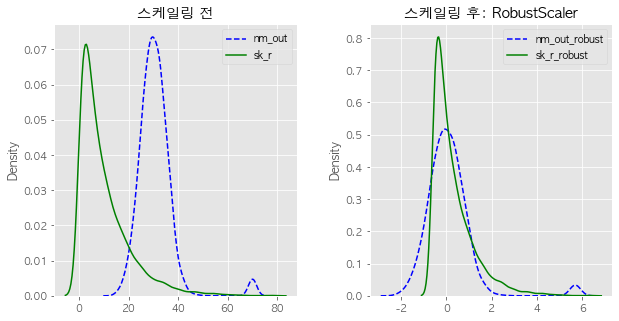

In [7]:
robust_scaler = RobustScaler()

cols_org = ["nm_out", "sk_r"] # 바꾸고자 하는 피처 리스트
cols_robust = ["nm_out_robust", "sk_r_robust"] # 스케일링된 피처 리스트
df[cols_robust] = pd.DataFrame(robust_scaler.fit_transform(df[cols_org].values), 
                                                     columns=cols_robust, 
                                                     index=df.index)

# 두 리스트를 묶어서(zip) IQR 계산
for col_org, col_scaled in zip(cols_org, cols_robust):
    Q3_org, Q1_org = np.percentile(df[col_org], [75 ,25])
    IQR_org = Q3_org - Q1_org

    Q3_scaled, Q1_scaled = np.percentile(df[col_scaled], [75 ,25])
    IQR_scaled = Q3_scaled - Q1_scaled

    print('IQR {}: {} vs {}'.format(col_org, round(IQR_org,2), round(IQR_scaled,2)))

get_comparisons(df, cols_org, cols_robust, 'RobustScaler')



### 3.2.11.3 MinMaxScaler: 최대/최솟값으로 범위 변환(Page 232)

,nm_out,sk_r,nm_out_minmax,sk_r_minmax
0,29.563,1.956,0.267,0.025
1,33.217,17.351,0.329,0.222
2,24.703,30.150,0.184,0.386
3,33.258,0.426,0.330,0.005
4,33.196,1.110,0.329,0.014
5,27.915,16.352,0.239,0.209
6,19.636,30.745,0.098,0.394
7,30.232,1.773,0.278,0.023
열이름,nm_out,sk_r,nm_out_minmax,sk_r_minmax
표준편차,7.500,10.140,0.130,0.130


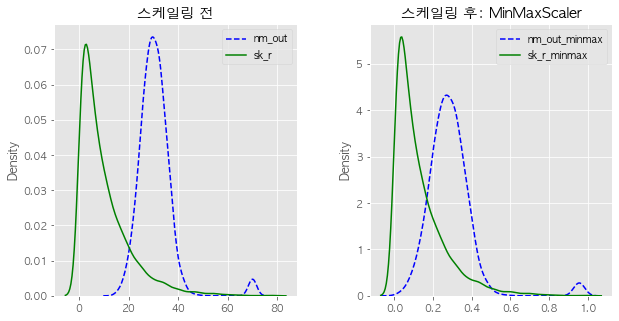

In [8]:
minmax_scaler = MinMaxScaler()
cols_org = ["nm_out", "sk_r"] # 바꾸고자 하는 피처 리스트
cols_minmax = ["nm_out_minmax", "sk_r_minmax"] # 스케일링된 피처 리스트
df[cols_minmax] = pd.DataFrame(minmax_scaler.fit_transform(df[cols_org].values), 
                                                     columns=cols_minmax, 
                                                     index=df.index)

get_comparisons(df, cols_org, cols_minmax, 'MinMaxScaler')


### 3.2.11.4 MaxAbsScaler: 최대절댓값으로 범위 변환(Page 236)

In [9]:
# sparse 데이터 
ex_sparse = np.array([9, 0, 0, 0, 0, 0, 0, 0, 1, -10])
df_sparse = pd.DataFrame({'org': ex_sparse})

# MinMaxScaler 사용했을 때 
minmax_scaler = MinMaxScaler()
df_sparse["minmax"] = pd.DataFrame(minmax_scaler.fit_transform(df_sparse[["org"]].values), 
                         columns=["minmax"], 
                         index=df_sparse.index)

# MaxAbsScaler사용했을 때 
maxabs_scaler = MaxAbsScaler()
df_sparse[["maxabs"]] = pd.DataFrame(maxabs_scaler.fit_transform(df_sparse[["org"]].values), 
                         columns=["maxabs"], 
                         index=df_sparse.index)
round(df_sparse,2)


,org,minmax,maxabs
0,9,1.00,0.9
1,0,0.53,0.0
2,0,0.53,0.0
3,0,0.53,0.0
4,0,0.53,0.0
5,0,0.53,0.0
6,0,0.53,0.0
7,0,0.53,0.0
8,1,0.58,0.1
9,-10,0.00,-1.0


### 저장된 스케일러로 스케일된 값을 원래 값으로 복원 (Page 240)

In [10]:
# 스케일러 저장 
import pickle
scalerfile = 'maxabs_scaler.pkl' # 파일 이름 설정
pickle.dump(maxabs_scaler, open(scalerfile, 'wb')) # 피클파일로 저장하기

# 스케일러 불러오기 
maxabs_scaler_loaded = pickle.load(open(scalerfile, 'rb'))

# 저장된 스케일러로 스케일된 값을 원래 값으로 복원하기
df_sparse["maxabs_back"] = pd.DataFrame(maxabs_scaler_loaded.inverse_transform(df_sparse[["maxabs"]].values) , 
                         columns=["maxabs_back"], 
                         index=df_sparse.index)

df_sparse


,org,minmax,maxabs,maxabs_back
0,9,1.000,0.9,9.0
1,0,0.526,0.0,0.0
2,0,0.526,0.0,0.0
3,0,0.526,0.0,0.0
4,0,0.526,0.0,0.0
5,0,0.526,0.0,0.0
6,0,0.526,0.0,0.0
7,0,0.526,0.0,0.0
8,1,0.579,0.1,1.0
9,-10,0.000,-1.0,-10.0


In [11]:
from sklearn import preprocessing

,nm_out,sk_r,nm_out_bc,sk_r_bc
0,29.563,1.956,-0.026,-0.951
1,33.217,17.351,0.532,0.944
2,24.703,30.150,-0.975,1.615
3,33.258,0.426,0.537,-1.771
4,33.196,1.110,0.529,-1.293
5,27.915,16.352,-0.317,0.878
6,19.636,30.745,-2.365,1.641
7,30.232,1.773,0.084,-1.014
열이름,nm_out,sk_r,nm_out_bc,sk_r_bc
표준편차,7.500,10.140,1.000,1.000


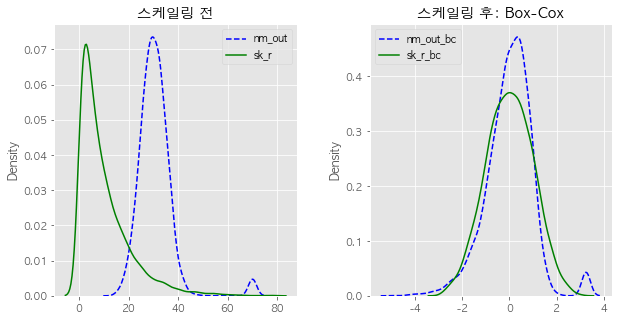

In [12]:
pt = preprocessing.PowerTransformer(method='box-cox')

cols_org = ["nm_out", "sk_r"] # 바꾸고자 하는 피처 리스트
cols_bc = ["nm_out_bc", "sk_r_bc"] # 스케일링된 피처 리스트

df[cols_bc] = pd.DataFrame(pt.fit_transform(df[cols_org].values),
                                         columns=cols_bc,
                                         index=df.index)
get_comparisons(df, cols_org, cols_bc, 'Box-Cox')


,sk_r,sk_r_ln,sk_r_bc
0,1.956,0.671,-0.951
1,17.351,2.854,0.944
2,30.150,3.406,1.615
3,0.426,-0.853,-1.771
4,1.110,0.105,-1.293
5,16.352,2.794,0.878
6,30.745,3.426,1.641
7,1.773,0.573,-1.014
열이름,sk_r,sk_r_ln,sk_r_bc
표준편차,10.140,1.270,1.000


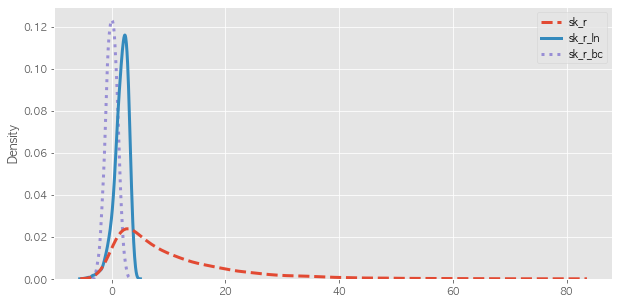

In [13]:
# matplotlib 폰트 설정 (Mac OS인 경우) 및 유니코드 에러 고치기 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 

df["sk_r_ln"] = np.log(df["sk_r"]) # sk_r에 로그변환 
sk_r_cols = ["sk_r", "sk_r_ln", "sk_r_bc"] # 비교할 피처 리스트 설정

# 밀도그래프로 기존 피처, 로그변환, 거듭곱변환 했을 때 분포 확인하기 
plots = sns.kdeplot(data=df[sk_r_cols], linewidth=3)
# 선 스타일[점선(Dotted), 실선(Solid), 파선(Dashed)]
line_styles = [':', '-', '--'] 

# 선 스타일에 맞게 그래프 라인 설정   
handles = plots.legend_.legendHandles[::-1]
for line, ls, handle in zip(plots.lines, line_styles, handles):
    line.set_linestyle(ls)
    handle.set_ls(ls)

sns.set(font_scale=1.5)

# 변환된 피처 통계치 확인 
df_display([df[sk_r_cols].head(8), 
            get_info(df, sk_r_cols)], 
            ["첫 8행", "변환 전&후 데이터 요약"])

⚠ 저작권: Copyright 2022. (이지영) all rights reserved. 본 자료는 저작권법에 의하여 보호받는 저작물로서 이에 대한 무단 복제 및 배포를 원칙적으로 금합니다. 협의 없이 배포하거나 무단으로 사용할 경우 저작권법 제136조, 137조, 138조 위반으로 사전 경고 없이 손해배상 청구 등 민,형사상의 책임과 처벌을 받을 수 있습니다.